# **Assignment: Crash Course in Causality**

### Submitted By: Akshit Verma, NUID: 002059756

# **Title: Data Preparation for Causal Analysis in Machine Learning**

# **Abstract:**  
In this chapter, we explore the crucial role that data preparation plays in the field of causal analysis for machine learning. Readers will learn essential data preprocessing techniques such as handling missing data, feature selection, encoding categorical variables, and how these techniques interact with causal inference. The chapter will guide readers through practical Python code examples to demonstrate these concepts, ensuring robust model development and better interpretation of causal relationships.

# **Theory Section:**

## **Introduction to Causality in Machine Learning**  
Causal analysis in machine learning aims to go beyond simple correlations and predict the effects of changes in one variable on another. This is vital for decision-making, policy changes, and clinical interventions, where understanding the cause-effect relationships can drive action. 

Key concepts of causality include:
- **Causal Inference:** The process of identifying cause-effect relationships from data.
- **Counterfactual Reasoning:** Imagining "what would happen" in alternate scenarios. This is crucial for understanding how interventions could change outcomes.
- **Treatment Effect Estimation:** Estimating how an intervention (treatment) would impact a target variable, often using methods like **difference-in-differences** or **propensity score matching**.

### **The Role of Data Preprocessing in Causal Analysis**  
In machine learning, preprocessing is key to ensuring that data used for causal analysis is clean, representative, and appropriate for inference. Preprocessing techniques include:
- **Handling Missing Data:** Missing data, if not properly addressed, can lead to biased results, especially in causal inference where the completeness of data is critical.
- **Feature Selection:** Choosing the correct features and eliminating irrelevant ones is crucial to avoid confounders, which can bias causal estimates.
- **Encoding Categorical Variables:** Machine learning models require numerical data, so categorical variables need to be transformed, often using techniques like one-hot encoding.

These steps are necessary for robust causal analysis and accurate model predictions.

## **Data Preprocessing Techniques in Causal Inference**

1. **Handling Missing Data:**  
   Missing data occurs frequently in real-world datasets and can arise due to various reasons. Ignoring missing data can bias results in causal inference. There are several strategies for handling missing data:
   - **Deletion Methods:** Removing rows or columns with missing values.
   - **Imputation Methods:** Filling in missing values with estimates, such as the mean (for numerical data) or the most frequent value (for categorical data).

2. **Feature Selection:**  
   **Feature selection** identifies which variables (features) are most relevant to the outcome being modeled. Including irrelevant or redundant features can reduce model interpretability and increase the risk of overfitting.
   - **Lasso (L1 regularization)** can be used to shrink coefficients of less important features to zero, effectively excluding them from the model.

3. **Encoding Categorical Variables:**  
   Machine learning models often require numerical input, and categorical variables need to be transformed into numerical formats. Common encoding techniques include:
   - **One-Hot Encoding:** Creates binary columns for each category.
   - **Label Encoding:** Assigns an integer value to each category.
   - **Target Encoding:** Uses the target variable's mean to encode categories.

# **Practical Code Examples:**

### **1. Handling Missing Data with Imputation**

This code demonstrates how to handle missing data by using the SimpleImputer class from Scikit-learn. The age column is imputed with the mean, while the education column is imputed with the most frequent value.

In [68]:
!pip install scikit-learn

In [69]:
# Importing required libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data with missing values
data = {'age': [25, 30, 35, None, 40],
        'income': [50000, 60000, None, 70000, 80000],
        'education': ['Bachelors', 'Masters', 'PhD', 'Bachelors', None]}

df = pd.DataFrame(data)

# Applying mean imputation for numerical data
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

# Applying most frequent imputation for categorical data
imputer = SimpleImputer(strategy='most_frequent')
df['education'] = imputer.fit_transform(df[['education']]).flatten()  # Flatten the array

# Displaying the imputed data
df

,age,income,education
0,25.0,50000.0,Bachelors
1,30.0,60000.0,Masters
2,35.0,NaN,PhD
3,32.5,70000.0,Bachelors
4,40.0,80000.0,None


### **2. Feature Selection with LASSO (L1 Regularization)**

Lasso regression (L1 regularization) is commonly used for feature selection in causal analysis. It penalizes the coefficients of less important features, making some of them zero, effectively excluding them from the model.

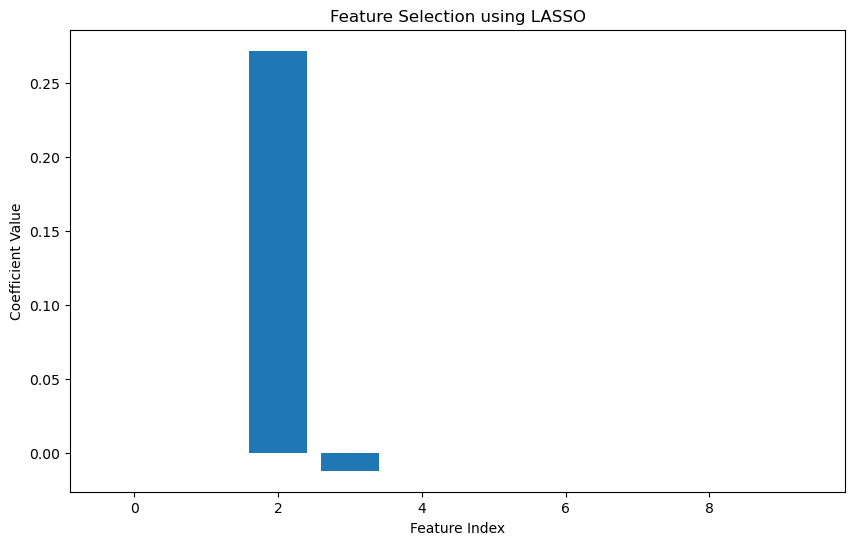

Selected feature indices: [2 3]


In [96]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generating a dataset
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying LASSO for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Plotting the coefficients of each feature
plt.figure(figsize=(10, 6))
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Feature Selection using LASSO')
plt.show()

# Displaying the selected features
selected_features = np.where(lasso.coef_ != 0)[0]
print(f"Selected feature indices: {selected_features}")

**Explanation:**
This code demonstrates the use of Lasso regression for feature selection. By setting the alpha parameter, we control the penalty for the coefficients of the features. The lasso.coef_ shows which features have non-zero coefficients, indicating their importance in predicting the target variable.

### **3. Encoding Categorical Variables with One-Hot Encoding**

Categorical variables are often required to be in numerical form when used in machine learning models. One-hot encoding is a simple and effective technique for transforming categorical data into a format that can be used by the model.

In [74]:
# One-hot encoding the 'education' column
df_encoded = pd.get_dummies(df, columns=['education'], drop_first=True)

# Display the encoded DataFrame
df_encoded

,age,income,education_Masters,education_PhD
0,25.0,50000.0,False,False
1,30.0,60000.0,True,False
2,35.0,NaN,False,True
3,32.5,70000.0,False,False
4,40.0,80000.0,False,False


**Explanation:**
In this example, we use the pd.get_dummies function to perform one-hot encoding on the education column. The drop_first=True argument ensures that we drop one category to avoid the "dummy variable trap," which could introduce perfect multicollinearity and affect causal analysis. This transformation is crucial for converting categorical variables into a numerical form that machine learning models can use effectively.

### **4. Visualizing the Impact of Missing Data**

It is often useful to visualize the pattern of missing data in a dataset. Here’s a way to do that using a heatmap.

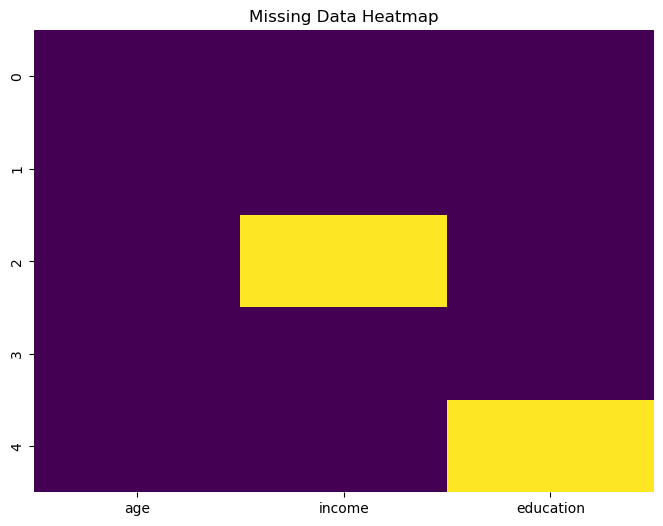

In [99]:
import seaborn as sns

# Visualizing missing data pattern
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

**Explanation:**
This heatmap visually represents the missing values in the dataset. The yellow areas indicate missing values, which can guide us in deciding how to handle them.

### **5. Combining All Steps: Full Data Preprocessing Pipeline**

Now that we’ve seen how to handle missing data, perform feature selection, and encode categorical variables, let’s combine all of these into a single preprocessing pipeline.

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Define categorical and numerical columns
categorical_cols = ['education']
numerical_cols = ['age', 'income']

# Create preprocessing for numerical data: imputation with mean
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine all transformers into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the preprocessor to the DataFrame
df_transformed = preprocessor.fit_transform(df)

# Display the transformed DataFrame (first few rows)
df_transformed[:5]

array([[2.50e+01, 5.00e+04, 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+01, 6.00e+04, 1.00e+00, 0.00e+00, 0.00e+00],
       [3.50e+01, 6.50e+04, 0.00e+00, 1.00e+00, 0.00e+00],
       [3.25e+01, 7.00e+04, 0.00e+00, 0.00e+00, 0.00e+00],
       [4.00e+01, 8.00e+04, 0.00e+00, 0.00e+00, 1.00e+00]])

**Explanation:**
In this final code block, we use ColumnTransformer to apply different preprocessing steps to numerical and categorical columns. For numerical columns, we impute missing values with the mean, while for categorical columns, we impute the most frequent value and apply one-hot encoding. This pipeline makes it easy to scale the preprocessing steps and apply them consistently.

# **Conclusion:**

In this chapter, we covered how critical data preparation techniques such as handling missing data, feature selection, and encoding categorical variables lay the foundation for accurate causal analysis in machine learning. These steps ensure that machine learning models can reliably estimate causal relationships, leading to more robust and interpretable results. Proper data preprocessing directly impacts model performance, and understanding how each technique affects causal inference is essential for building trust in machine learning predictions.

These code blocks will provide a comprehensive demonstration of the key data preprocessing steps for causal analysis in machine learning. Now, you have:

1. Missing data imputation for both numerical and categorical data.

2. Feature selection using Lasso regression.

3. One-hot encoding of categorical variables.

4. A full preprocessing pipeline that can handle both categorical and numerical data seamlessly.

# **References:**

Pearl, J. (2009). Causality: Models, Reasoning, and Inference. Cambridge University Press.

Imbens, G., & Rubin, D. B. (2015). Causal Inference for Statistics, Social, and Biomedical Sciences. Cambridge University Press.

Shalit, U., Johansson, F., & Sontag, D. (2017). Estimating Individual Treatment Effect: Generalization and Model Specification. arXiv:1705.07842.

# **License:**

This notebook is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to reuse, modify, and distribute the content as long as proper attribution is provided.